# Task 1

## Used packages

In [39]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.constants as const
from matplotlib.pyplot import figure
matplotlib.rcParams['text.usetex'] = True

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

## Used functions

In [43]:
# initial parameters

h_dash = 1
h = 2 * np.pi
m_e = h_dash
e = h_dash
pi = np.pi
m_p = 1836.15 * m_e 

A_Li = 152.1    #in MHz
A_Rb = 1011.9

S_Li = 0.5
S_Rb = S_Li

I_Li = 1
I_Rb = 5 / 2

mu_B = (e * h_dash) / (2 * m_e)    # Bohr magneton in atomic units
mu_N = (e * h_dash) / (2 * m_p)    # Nuclear magneton in atomic units

g_e = 2.002319
g_N_Li = -0.000447
g_N_Rb = -0.000294

B_min = 0
B_max = 2000    # Magnetic field gauss units
samples = 1000
step = 0.5
n = 4

B = np.arange(B_min, B_max, step)  
# B

#  For Lithium and B_min

g_e_mu_B_B0 = g_e * mu_B * B_min * 0.5
g_n_mu_K_B0 = g_N_Li * mu_N * B_min * 0.5
hA4 = h * A_Li / 4

H_matrix = np.zeros((n, n))

# Diagonal elements
H_matrix[0][0] = g_e_mu_B_B0 - g_n_mu_K_B0 + hA4
H_matrix[1][1] = g_e_mu_B_B0 + g_n_mu_K_B0 - hA4
H_matrix[2][2] = - g_e_mu_B_B0 - g_n_mu_K_B0 - hA4
H_matrix[3][3] = - g_e_mu_B_B0 + g_n_mu_K_B0 + hA4

H_matrix[2][1] = hA4
H_matrix[1][2] = hA4

w, v = np.linalg.eig(H_matrix) # w eigenvalues and v eigenvectors
print(w)
# H_matrix

# plt.scatter(B_min, w[0])

# Probably I have to populate H_matrix using formula on slide 18, maybe it would work
# Simply make one big function to do this
# I have to convert gauss --> SI --> atomic units


[ 2.84217094e-14 -4.77836243e+02  2.38918121e+02  2.38918121e+02]


## Spectrum for Lithium atoms

Text(0, 0.5, 'Atomic energy $E$ [MHz]')

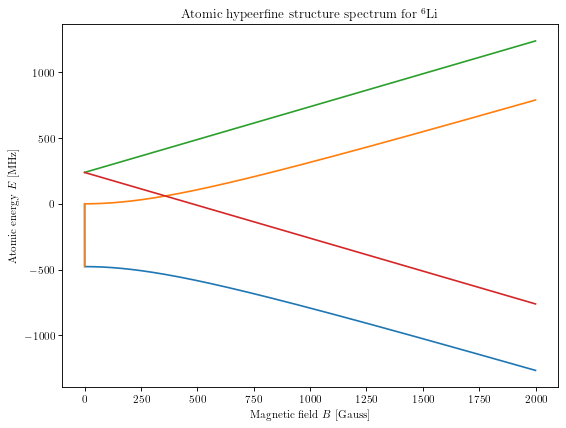

In [61]:
numb = 1
energy_values_0 = np.array([])
energy_values_1 = np.array([])
energy_values_2 = np.array([])
energy_values_3 = np.array([])

for b in B:
    g_e_mu_B_B0 = g_e * mu_B * b * 0.5
    g_n_mu_K_B0 = g_N_Li * mu_N * b * 0.5
    hA4 = h * A_Li / 4

    H_matrix = np.zeros((n, n))

    # Diagonal elements
    H_matrix[0][0] = g_e_mu_B_B0 - g_n_mu_K_B0 + hA4
    H_matrix[1][1] = g_e_mu_B_B0 + g_n_mu_K_B0 - hA4
    H_matrix[2][2] = - g_e_mu_B_B0 - g_n_mu_K_B0 - hA4
    H_matrix[3][3] = - g_e_mu_B_B0 + g_n_mu_K_B0 + hA4

    H_matrix[2][1] = hA4
    H_matrix[1][2] = hA4

    w, v = np.linalg.eig(H_matrix) # w eigenvalues and v eigenvectors
    energy_values_0 = np.append(energy_values_0, w[0])
    energy_values_1 = np.append(energy_values_1, w[1])
    energy_values_2 = np.append(energy_values_2, w[2])
    energy_values_3 = np.append(energy_values_3, w[3])

# H_matrix
figure(figsize=(8, 6), dpi=80)
plt.plot(B, energy_values_0)
plt.plot(B, energy_values_1)
plt.plot(B, energy_values_2)
plt.plot(B, energy_values_3)

plt.title(r'Atomic hypeerfine structure spectrum for $^6$Li')
plt.xlabel(r'Magnetic field $B$ [Gauss]')
plt.ylabel(r'Atomic energy $E$ [MHz]')


## Spectrum for Rubidium atoms

Text(0, 0.5, 'Atomic energy $E$ [MHz]')

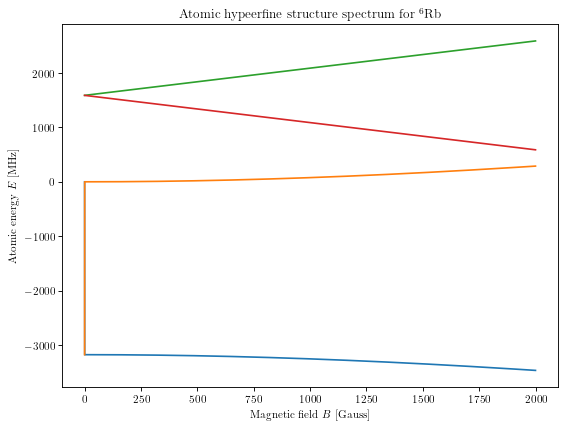

In [62]:
energy_values_0 = np.array([])
energy_values_1 = np.array([])
energy_values_2 = np.array([])
energy_values_3 = np.array([])

for b in B:
    g_e_mu_B_B0 = g_e * mu_B * b * 0.5
    g_n_mu_K_B0 = g_N_Rb * mu_N * b * 0.5
    hA4 = h * A_Rb / 4

    H_matrix = np.zeros((n, n))

    # Diagonal elements
    H_matrix[0][0] = g_e_mu_B_B0 - g_n_mu_K_B0 + hA4
    H_matrix[1][1] = g_e_mu_B_B0 + g_n_mu_K_B0 - hA4
    H_matrix[2][2] = - g_e_mu_B_B0 - g_n_mu_K_B0 - hA4
    H_matrix[3][3] = - g_e_mu_B_B0 + g_n_mu_K_B0 + hA4

    H_matrix[2][1] = hA4
    H_matrix[1][2] = hA4

    w, v = np.linalg.eig(H_matrix) # w eigenvalues and v eigenvectors
    energy_values_0 = np.append(energy_values_0, w[0])
    energy_values_1 = np.append(energy_values_1, w[1])
    energy_values_2 = np.append(energy_values_2, w[2])
    energy_values_3 = np.append(energy_values_3, w[3])

# H_matrix
figure(figsize=(8, 6), dpi=80)
plt.plot(B, energy_values_0)
plt.plot(B, energy_values_1)
plt.plot(B, energy_values_2)
plt.plot(B, energy_values_3)

plt.title(r'Atomic hypeerfine structure spectrum for $^6$Rb')
plt.xlabel(r'Magnetic field $B$ [Gauss]')
plt.ylabel(r'Atomic energy $E$ [MHz]')
